# Trajectory with STREAM2 for the patient 2
Trajectory done on all the 5 time points
Apply on the cell type subset : T cells, B cells, macrophages, monocytes, NK 

In [81]:
#!pip uninstall stream2 -y
#!pip install git+https://github.com/pinellolab/STREAM2.git
# Restart the kernel
import stream2 as st2
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
#!pip3 install leidenalg

In [82]:
adata = sc.read("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Matrix/p2.h5ad")

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/anndata/_io/h5ad.py:266: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{


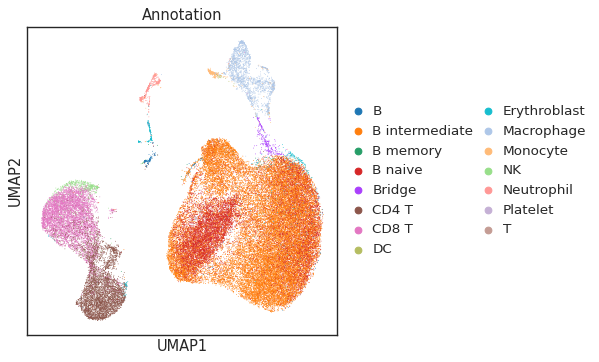

In [83]:
sc.pl.umap(adata,color=['Annotation'])

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:940: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


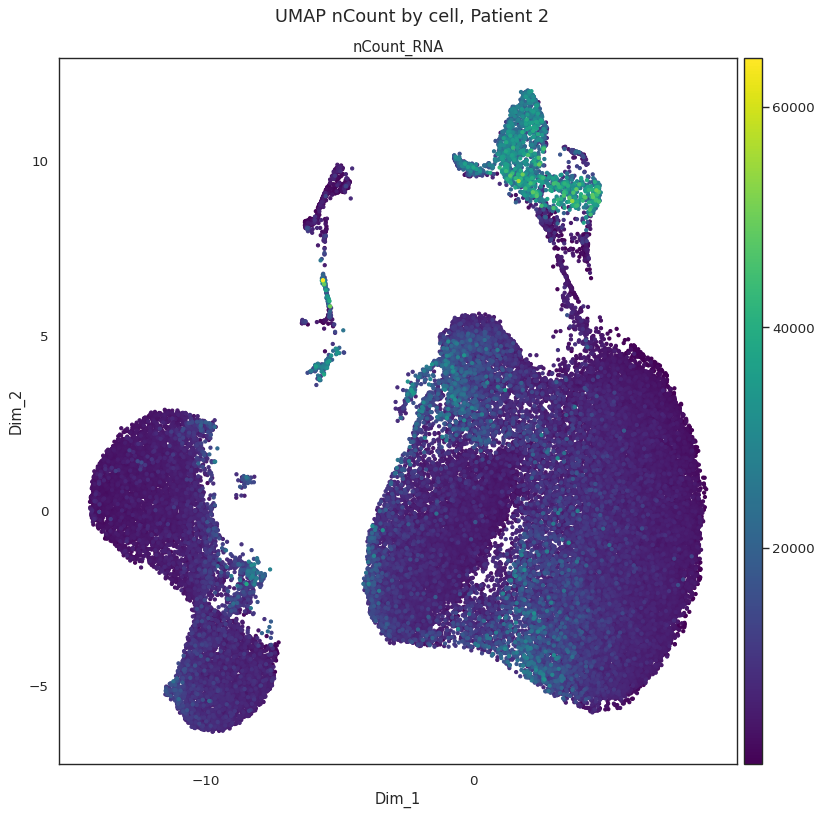

In [84]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

st2.pl.dimension_reduction(adata,color=['nCount_RNA'],
                           fig_legend_ncol=2, fig_size=(10,10))
plt.suptitle("UMAP nCount by cell, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/ncount_p2.png", dpi=300, bbox_inches='tight')

In [85]:
cell_types_to_keep = [ 'B intermediate', 'B memory', 'B naive', 'Monocyte', 'Macrophage', 'Bridge']
adata = adata[adata.obs['Annotation'].isin(cell_types_to_keep)].copy()

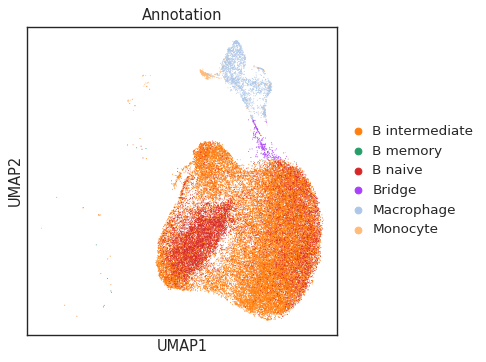

In [86]:
sc.pl.umap(adata,color=['Annotation'])

Found 1 components


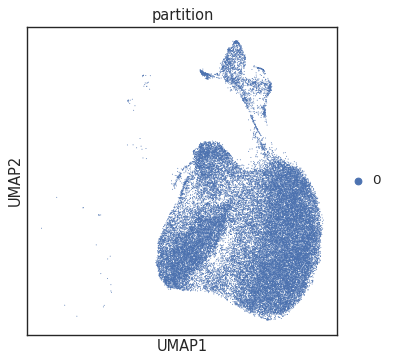

In [87]:
sc.pp.neighbors(adata,use_rep='X_pca')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

<Axes: xlabel='partition'>

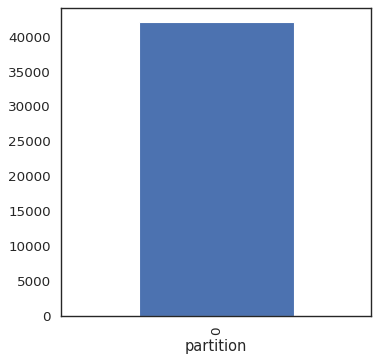

In [88]:
# Many are small clusters which are not adequate for trajectory inference and can be filtered out
# We keep components with more than 500 cells
adata.obs['partition'].value_counts().plot.bar()

Seeding initial graph for each partition...
Learning elastic principal graph for each partition...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


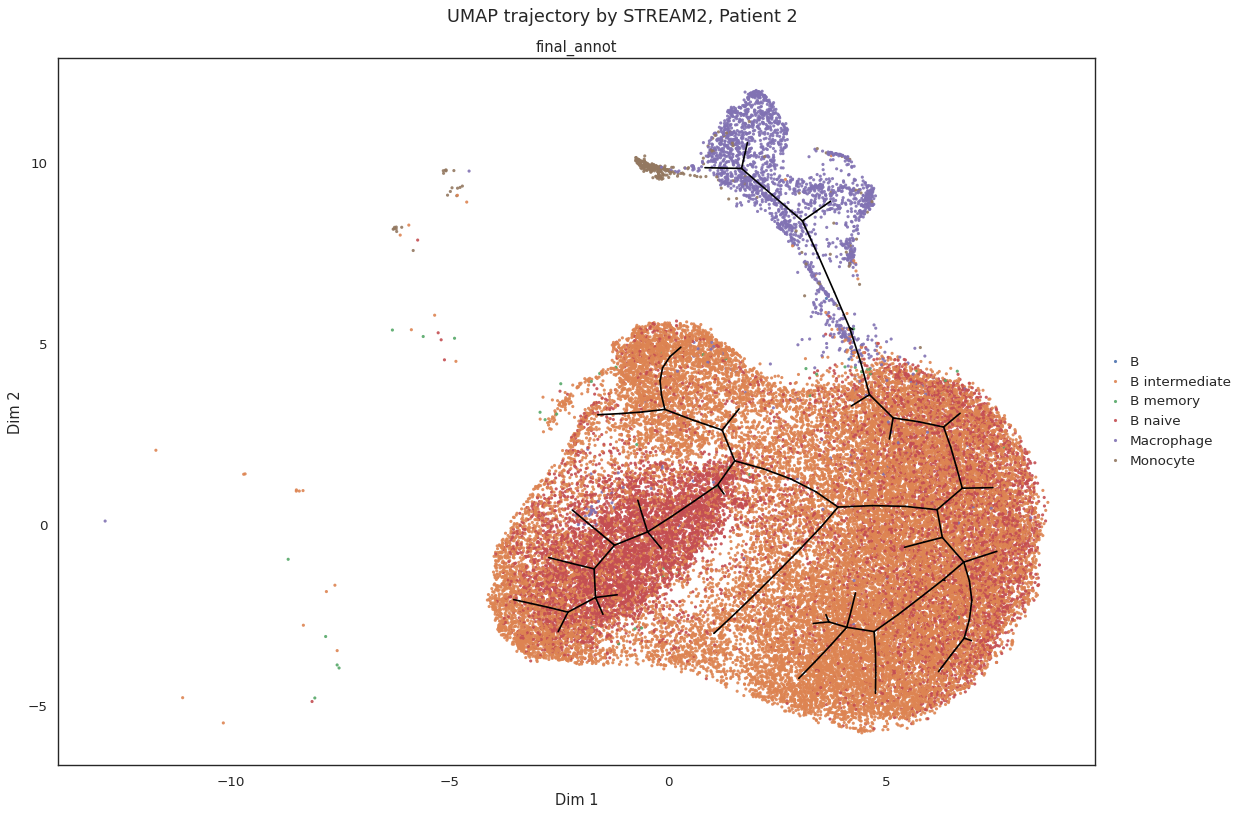

In [89]:
use_partition=['0']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=100,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.2,use_partition=use_partition)
st2.pl.graph(adata,key='epg',color=['final_annot'],fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_p2.png", dpi=300, bbox_inches='tight')
#adata_sub.uns['epg']['leaves']

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


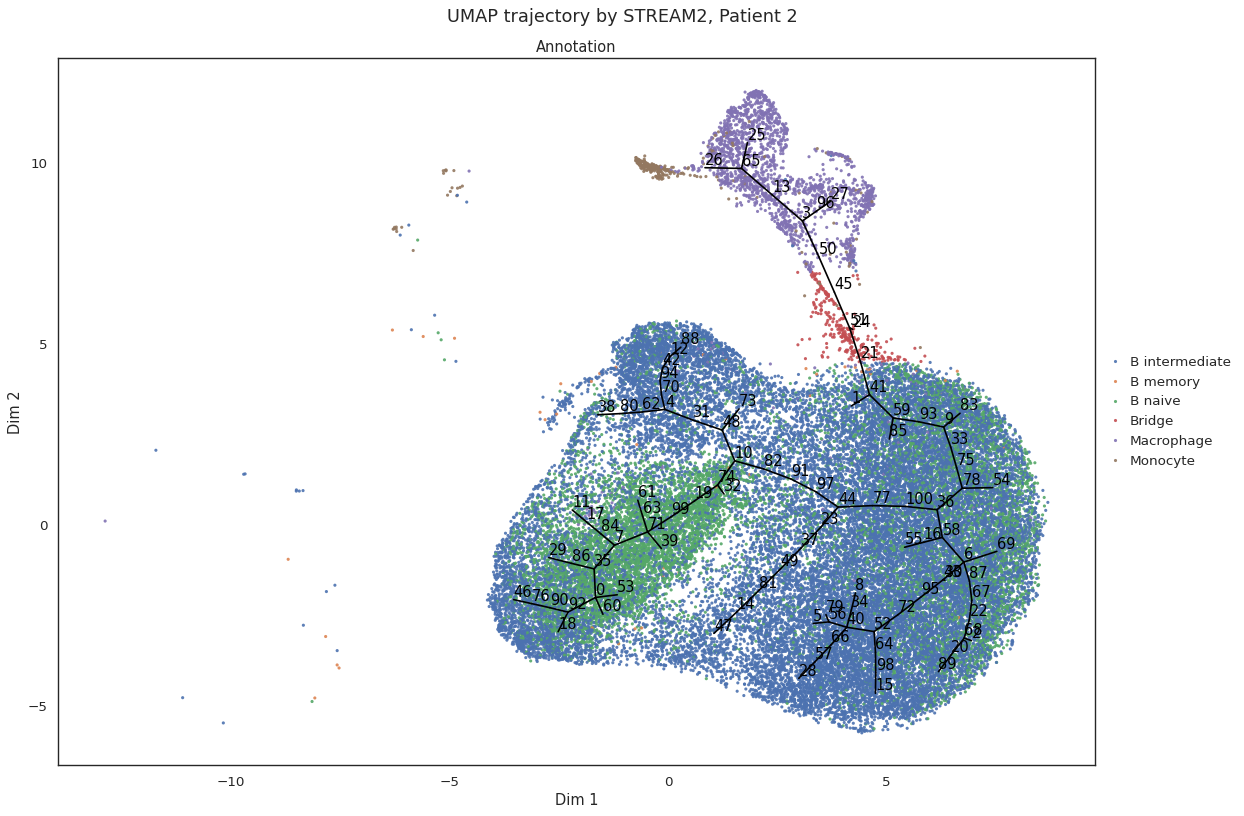

In [90]:
st2.tl._elpigraph._store_graph_attributes(adata,adata.obsm['X_umap'],'epg')
st2.pl.graph(adata,key='epg',color=['Annotation'],show_text=True,fig_size=(15,10),save_fig=False)
plt.suptitle("UMAP trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_v2_p2.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


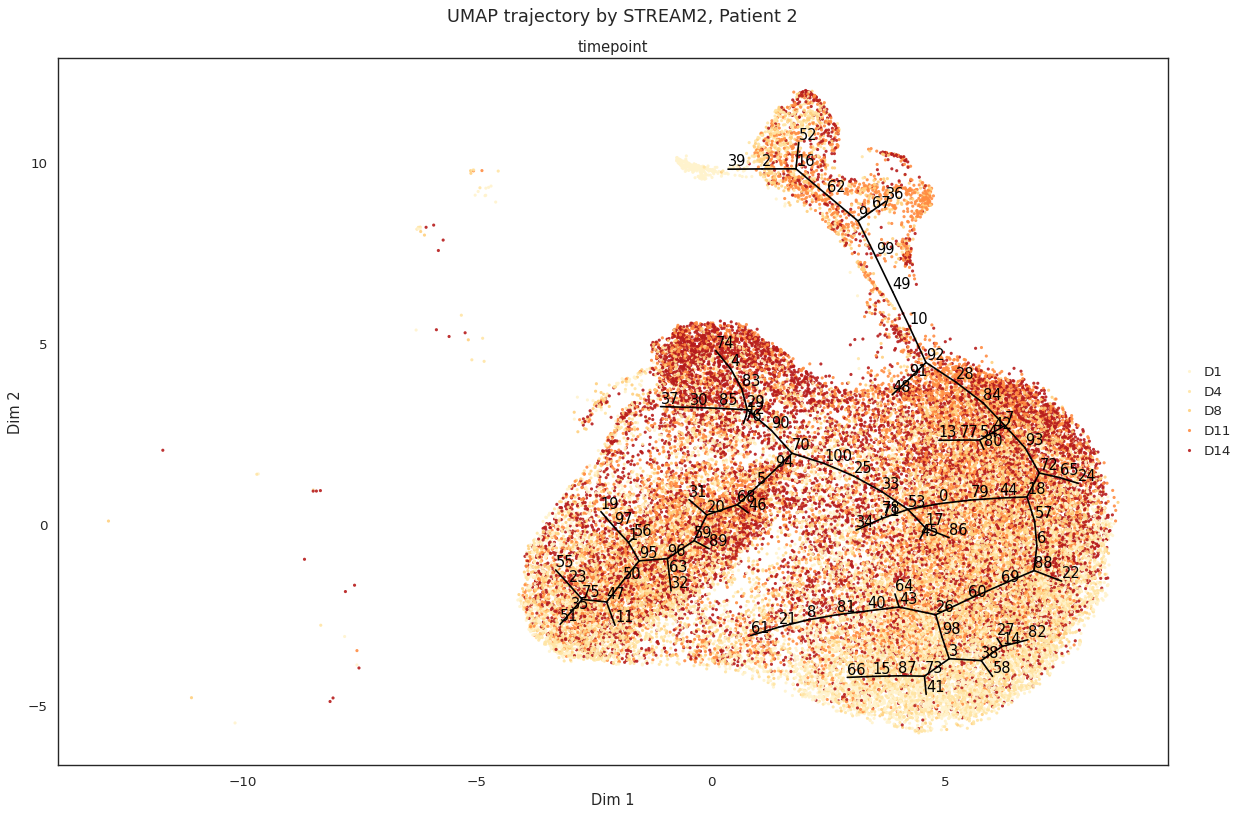

In [33]:
fig_legend_order = {
    'timepoint': ['D1', 'D4', 'D8', 'D11', 'D14']
}

dict_palette = {
    'timepoint': {
        'D1':  '#FFF3CD',
        'D4':  '#FFE5A5',
        'D8':  '#FFD07E',
        'D11': '#FF8C42',
        'D14': '#B71C1C'
    }
}

st2.pl.graph(
    adata,
    key='epg',
    color=['timepoint'],
    dict_palette=dict_palette,
    fig_legend_order=fig_legend_order,
    show_text=True,
    fig_size=(15,10),
    save_fig=False
)

plt.suptitle("UMAP trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/graph_v3_p2.png", dpi=300, bbox_inches='tight')

In [70]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.tl.seed_graph(adata, obsm='X_dr', n_clusters=10)
st2.tl.learn_graph(adata, obsm='X_dr', n_nodes=15, method='principal_tree',)

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1110: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


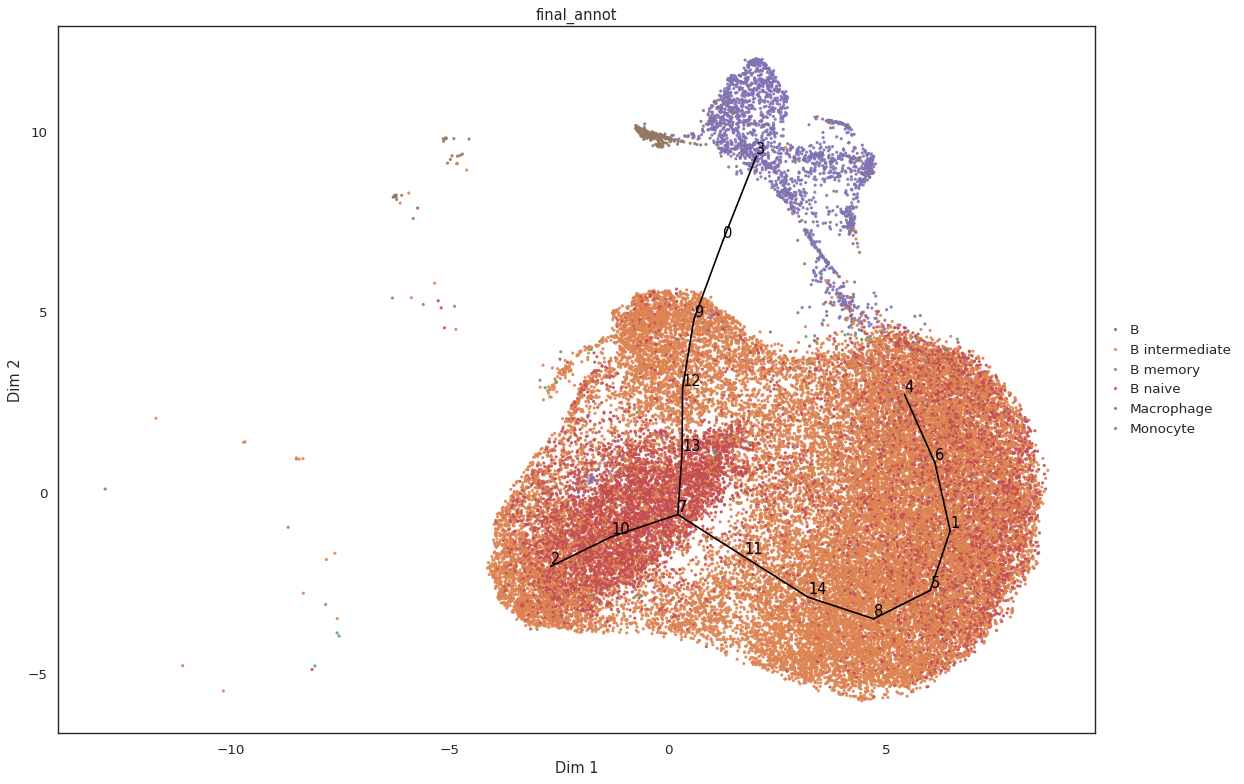

In [71]:
st2.pl.graph(adata,key='epg',color=['final_annot'],show_text=True,fig_size=(15,10),save_fig=False)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_

Text(0.5, 1.02, 'Arborescence trajectory by STREAM2, Patient 2')

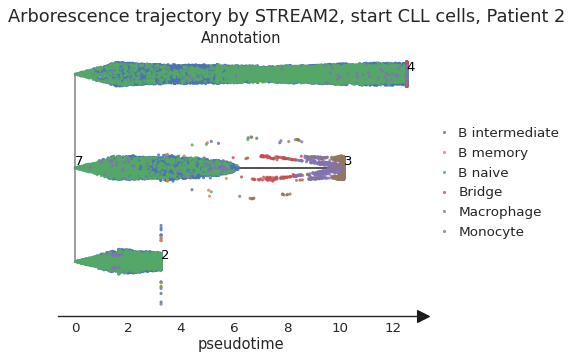

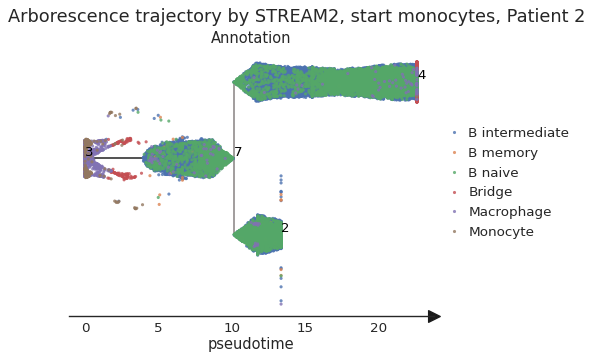

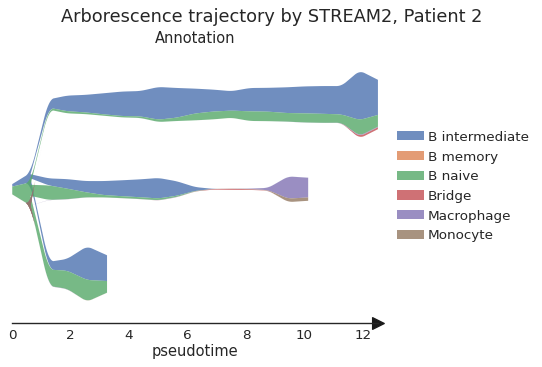

In [74]:
st2.pl.stream_sc(adata, source=7, 
                 dist_scale=0.2, 
                 color=['Annotation'],
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
plt.suptitle("Arborescence trajectory by STREAM2, start CLL cells, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p2_arbo_cll.png", dpi=300, bbox_inches='tight')

st2.pl.stream_sc(adata, source=3, 
                 dist_scale=0.2, 
                 color=['Annotation'],
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
plt.suptitle("Arborescence trajectory by STREAM2, start monocytes, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p2_arbo_mono.png", dpi=300, bbox_inches='tight')

st2.pl.stream(adata, source=7, 
                 dist_scale=0.8, 
                 color=['Annotation'],
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
#plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p2_arbo_cll2.png", dpi=300, bbox_inches='tight')

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update t

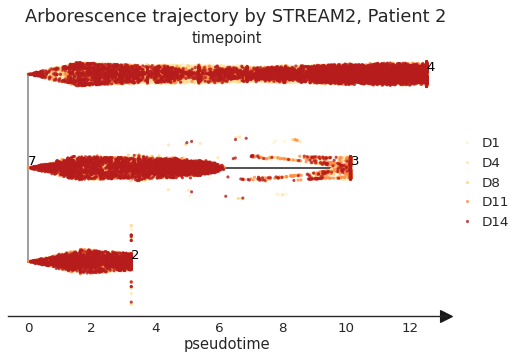

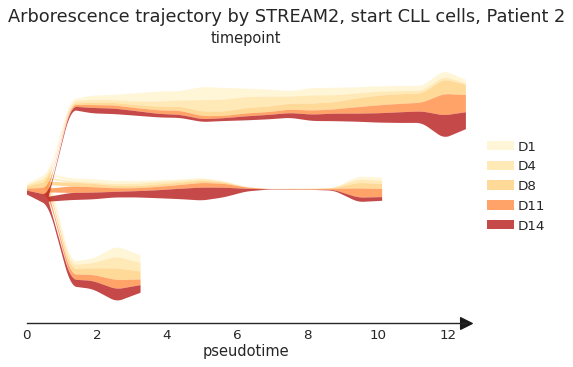

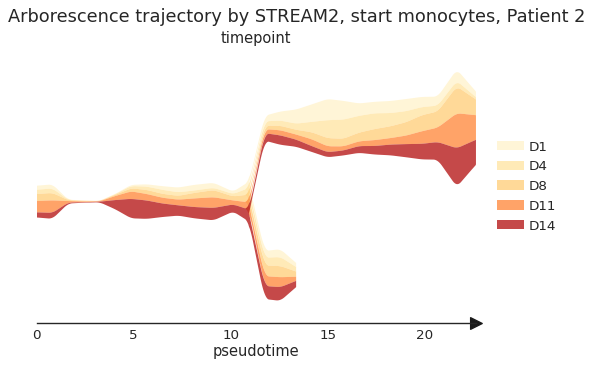

In [78]:
fig_legend_order = {
    'timepoint': ['D1', 'D4', 'D8', 'D11', 'D14']
}

dict_palette = {
    'timepoint': {
        'D1':  '#FFF3CD',
        'D4':  '#FFE5A5',
        'D8':  '#FFD07E',
        'D11': '#FF8C42',
        'D14': '#B71C1C'
    }
}
st2.pl.stream_sc(adata, source=7, 
                 dist_scale=0.2, 
                 color=['timepoint'],
                 dict_palette=dict_palette,
                 fig_legend_order=fig_legend_order,
                 fig_ncol=2,
                 fig_legend_ncol=1,
                 save_fig=False)
plt.suptitle("Arborescence trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)

st2.pl.stream(adata, source=7, 
                 dist_scale=0.8, 
                 color=['timepoint'], dict_palette=dict_palette,
                 fig_legend_order=fig_legend_order,
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, start CLL cells, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p2_arbo_time_cll.png", dpi=300, bbox_inches='tight')

st2.pl.stream(adata, source=3, 
                 dist_scale=0.8, 
                 color=['timepoint'], dict_palette=dict_palette,
                 fig_legend_order=fig_legend_order,
                 fig_legend_ncol=1)
plt.suptitle("Arborescence trajectory by STREAM2, start monocytes, Patient 2", fontsize=16, y=1.02)
plt.savefig("/home/a.blanc-boekholt/Documents/Singlecell-R/Scripts/Plots/p2_arbo_time_mono.png", dpi=300, bbox_inches='tight')

Seeding initial graph...
Clustering...
K-Means clustering ...
Calculating minimum spanning tree...


/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:940: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():


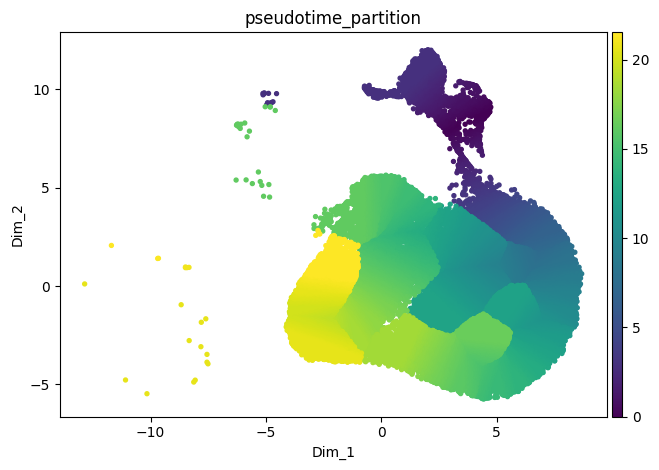

In [18]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
adata.obs['pseudotime_partition'] = np.nan
for part in ['0']:
    cells = adata.obs_names[adata.obs['partition'] == part]
    adata_sub = adata[cells].copy()

    st2.tl.seed_graph(adata_sub, obsm='X_umap', n_clusters=50)

    st2.tl.learn_graph(adata_sub, obsm='X_dr', n_nodes=60, method='principal_tree',)
    
    st2.tl.infer_pseudotime(
        adata_sub,
        source=4,
        key='epg',
        copy=False
    )

    adata.obs.loc[cells, 'pseudotime_partition'] = adata_sub.obs['epg_pseudotime']

adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.pl.dimension_reduction(adata, color=['pseudotime_partition'])
#plt.suptitle("UMAP trajectory by STREAM2, Patient 2", fontsize=16, y=1.02)
#plt.savefig("Plots/p2.png", dpi=300, bbox_inches='tight')